In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv("C:/Users/User/Desktop/Elevate Labs/Task 1/Titanic-Dataset.csv")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nData types:")
print(df.dtypes)
print("\nBasic info:")
df.info()

print("\nMISSING VALUES ANALYSIS")
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

print("\nDESCRIPTIVE STATISTICS")
df.describe()


Dataset shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Tic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


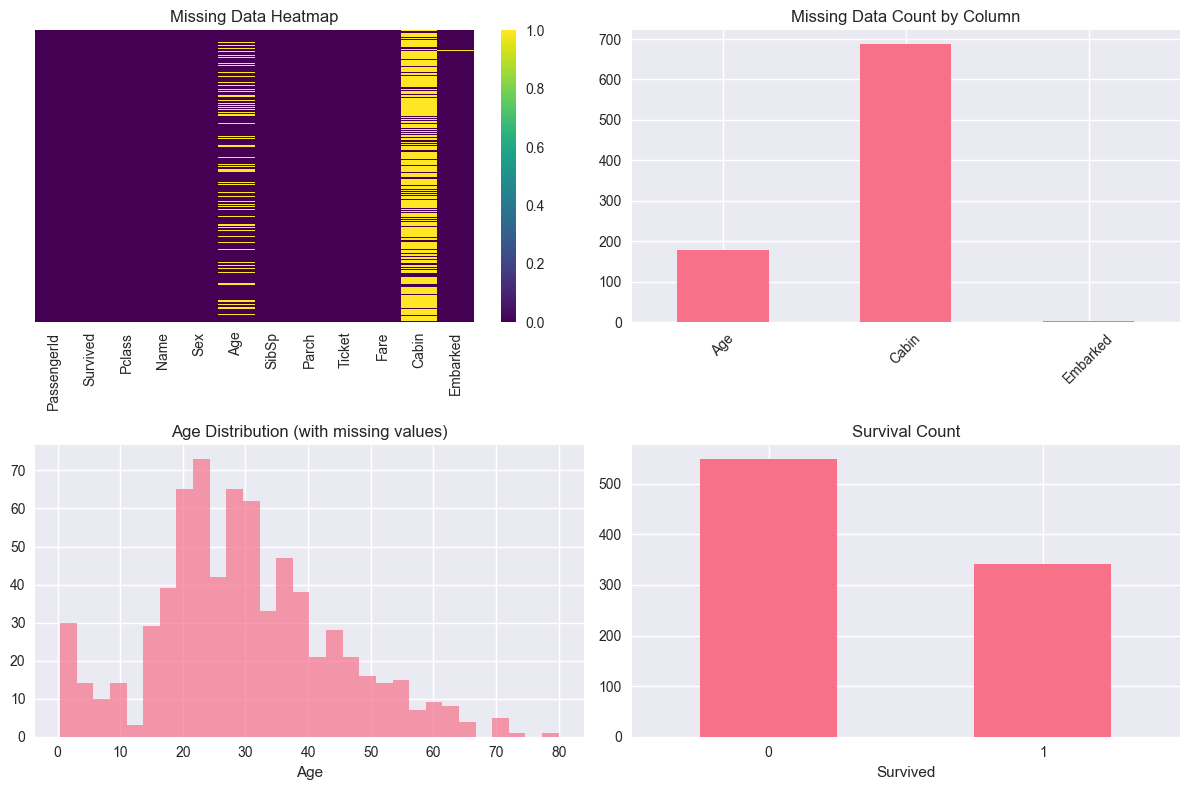

In [5]:
# Create missing data visualization
plt.figure(figsize=(12, 8))

# Subplot 1: Missing data heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')

# Subplot 2: Missing data bar plot
plt.subplot(2, 2, 2)
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.plot(kind='bar')
plt.title('Missing Data Count by Column')
plt.xticks(rotation=45)

# Subplot 3: Age distribution
plt.subplot(2, 2, 3)
df['Age'].hist(bins=30, alpha=0.7)
plt.title('Age Distribution (with missing values)')
plt.xlabel('Age')

# Subplot 4: Survival rate
plt.subplot(2, 2, 4)
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [6]:
# Create a copy for cleaning
df_clean = df.copy()

# 1. Handle Age missing values - use median by passenger class
print("Handling Age missing values...")
age_median_by_class = df_clean.groupby('Pclass')['Age'].median()
print(f"Median age by class:\n{age_median_by_class}")

for pclass in df_clean['Pclass'].unique():
    mask = (df_clean['Pclass'] == pclass) & (df_clean['Age'].isnull())
    df_clean.loc[mask, 'Age'] = age_median_by_class[pclass]

# 2. Handle Embarked missing values - use mode
print("\nHandling Embarked missing values...")
embarked_mode = df_clean['Embarked'].mode()[0]
print(f"Most common embarked port: {embarked_mode}")
df_clean['Embarked'].fillna(embarked_mode, inplace=True)

# 3. Handle Cabin missing values - create binary feature
print("\nHandling Cabin missing values...")
df_clean['Has_Cabin'] = df_clean['Cabin'].notna().astype(int)
df_clean.drop('Cabin', axis=1, inplace=True)

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

Handling Age missing values...
Median age by class:
Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Handling Embarked missing values...
Most common embarked port: S

Handling Cabin missing values...

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


In [7]:
# 1. Extract title from name
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(f"Unique titles: {df_clean['Title'].value_counts()}")

# Group rare titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss', 
    'Mrs': 'Mrs',
    'Master': 'Master'
}
df_clean['Title'] = df_clean['Title'].map(title_mapping).fillna('Rare')

# 2. Create family size feature
df_clean['Family_Size'] = df_clean['SibSp'] + df_clean['Parch'] + 1

# 3. Create age groups
df_clean['Age_Group'] = pd.cut(df_clean['Age'], 
                               bins=[0, 12, 18, 35, 60, 100], 
                               labels=['Child', 'Teen', 'Adult', 'Middle_Age', 'Senior'])

# 4. Create fare groups
df_clean['Fare_Group'] = pd.qcut(df_clean['Fare'], 
                                 q=4, 
                                 labels=['Low', 'Medium', 'High', 'Very_High'])

print("New features created:")
print(f"- Title: {df_clean['Title'].value_counts()}")
print(f"- Family_Size: {df_clean['Family_Size'].describe()}")
print(f"- Age_Group: {df_clean['Age_Group'].value_counts()}")
print(f"- Fare_Group: {df_clean['Fare_Group'].value_counts()}")



Unique titles: Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
New features created:
- Title: Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64
- Family_Size: count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family_Size, dtype: float64
- Age_Group: Age_Group
Adult         505
Middle_Age    225
Teen           70
Child          69
Senior         22
Name: count, dtype: int64
- Fare_Group: Fare_Group
Medium       224
Low          223
High         222
Very_High    222
Name: count, dtype: int64


In [8]:
# Initialize label encoder
le = LabelEncoder()

# Columns to encode
categorical_columns = ['Sex', 'Embarked', 'Title', 'Age_Group', 'Fare_Group']

# Store original values for reference
encoding_mappings = {}

for col in categorical_columns:
    df_clean[f'{col}_encoded'] = le.fit_transform(df_clean[col])
    encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col} encoding: {encoding_mappings[col]}")

# Drop original categorical columns and keep encoded ones
df_clean.drop(categorical_columns, axis=1, inplace=True)

# Drop non-predictive columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
df_clean.drop(columns_to_drop, axis=1, inplace=True)

print(f"\nDataset shape after encoding: {df_clean.shape}")
print(f"Columns: {list(df_clean.columns)}")

Sex encoding: {'female': 0, 'male': 1}
Embarked encoding: {'C': 0, 'Q': 1, 'S': 2}
Title encoding: {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Rare': 4}
Age_Group encoding: {'Adult': 0, 'Child': 1, 'Middle_Age': 2, 'Senior': 3, 'Teen': 4}
Fare_Group encoding: {'High': 0, 'Low': 1, 'Medium': 2, 'Very_High': 3}

Dataset shape after encoding: (891, 13)
Columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Family_Size', 'Sex_encoded', 'Embarked_encoded', 'Title_encoded', 'Age_Group_encoded', 'Fare_Group_encoded']


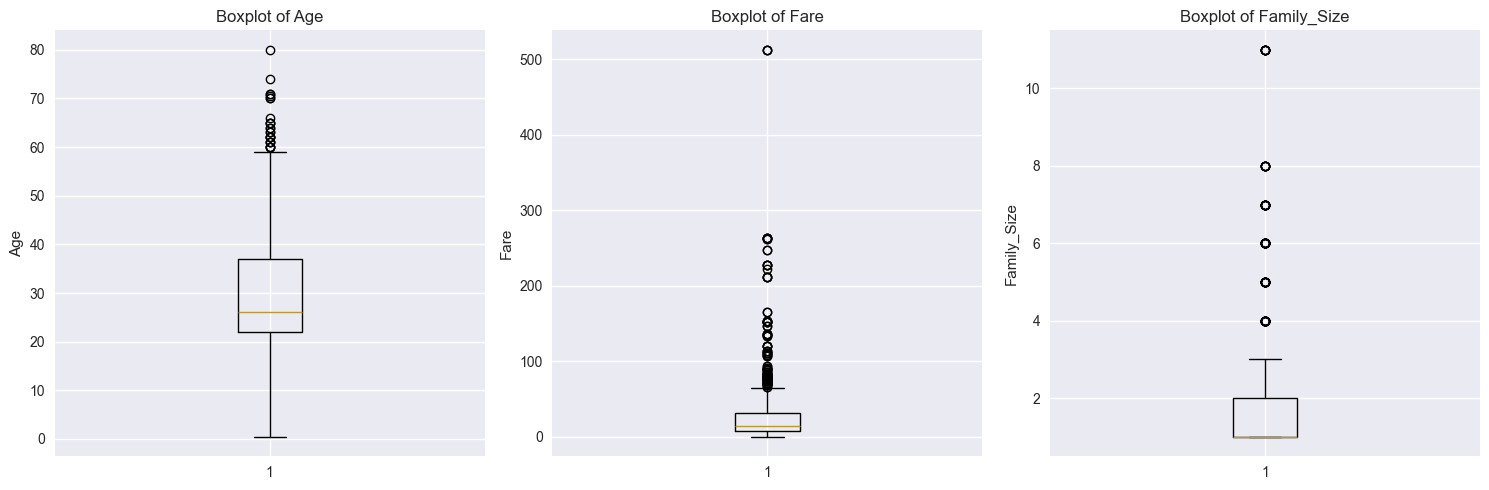

Age outliers: 26 (2.92%)
Fare outliers: 116 (13.02%)
Family_Size outliers: 91 (10.21%)


In [9]:
# Select numerical columns for outlier detection
numerical_cols = ['Age', 'Fare', 'Family_Size']

# Create boxplots to visualize outliers
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df_clean[col].dropna())
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in each numerical column
outlier_info = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    outlier_info[col] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(df_clean) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"{col} outliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.2f}%)")


In [10]:
# Remove extreme outliers only for Fare (keeping reasonable outliers)
Q1_fare = df_clean['Fare'].quantile(0.25)
Q3_fare = df_clean['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
extreme_upper = Q3_fare + 3 * IQR_fare  # Use 3*IQR instead of 1.5*IQR

print(f"Fare extreme outlier threshold: {extreme_upper:.2f}")
extreme_outliers = df_clean[df_clean['Fare'] > extreme_upper]
print(f"Extreme fare outliers to remove: {len(extreme_outliers)}")

# Remove extreme outliers
df_clean = df_clean[df_clean['Fare'] <= extreme_upper]
print(f"Dataset shape after outlier removal: {df_clean.shape}")


Fare extreme outlier threshold: 100.27
Extreme fare outliers to remove: 53
Dataset shape after outlier removal: (838, 13)


In [11]:
# Separate features and target
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['Age', 'Fare', 'Family_Size']
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])

print("Features scaled successfully!")
print(f"Scaled features shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")

# Show scaling results
print("\nBefore scaling (numerical features):")
print(X[numerical_features].describe())
print("\nAfter scaling (numerical features):")
print(X_scaled[numerical_features].describe())


Features scaled successfully!
Scaled features shape: (838, 12)
Target shape: (838,)

Before scaling (numerical features):
              Age        Fare  Family_Size
count  838.000000  838.000000   838.000000
mean    28.853520   22.411942     1.863962
std     13.180901   20.827218     1.611819
min      0.420000    0.000000     1.000000
25%     22.000000    7.895800     1.000000
50%     26.000000   13.000000     1.000000
75%     36.000000   27.720800     2.000000
max     80.000000   93.500000    11.000000

After scaling (numerical features):
                Age          Fare   Family_Size
count  8.380000e+02  8.380000e+02  8.380000e+02
mean  -1.102274e-16  2.713290e-16  3.603588e-17
std    1.000597e+00  1.000597e+00  1.000597e+00
min   -2.158464e+00 -1.076732e+00 -5.363369e-01
25%   -5.202689e-01 -6.973957e-01 -5.363369e-01
50%   -2.166183e-01 -4.521758e-01 -5.363369e-01
75%    5.425083e-01  2.550522e-01  8.445084e-02
max    3.882665e+00  3.415267e+00  5.671541e+00


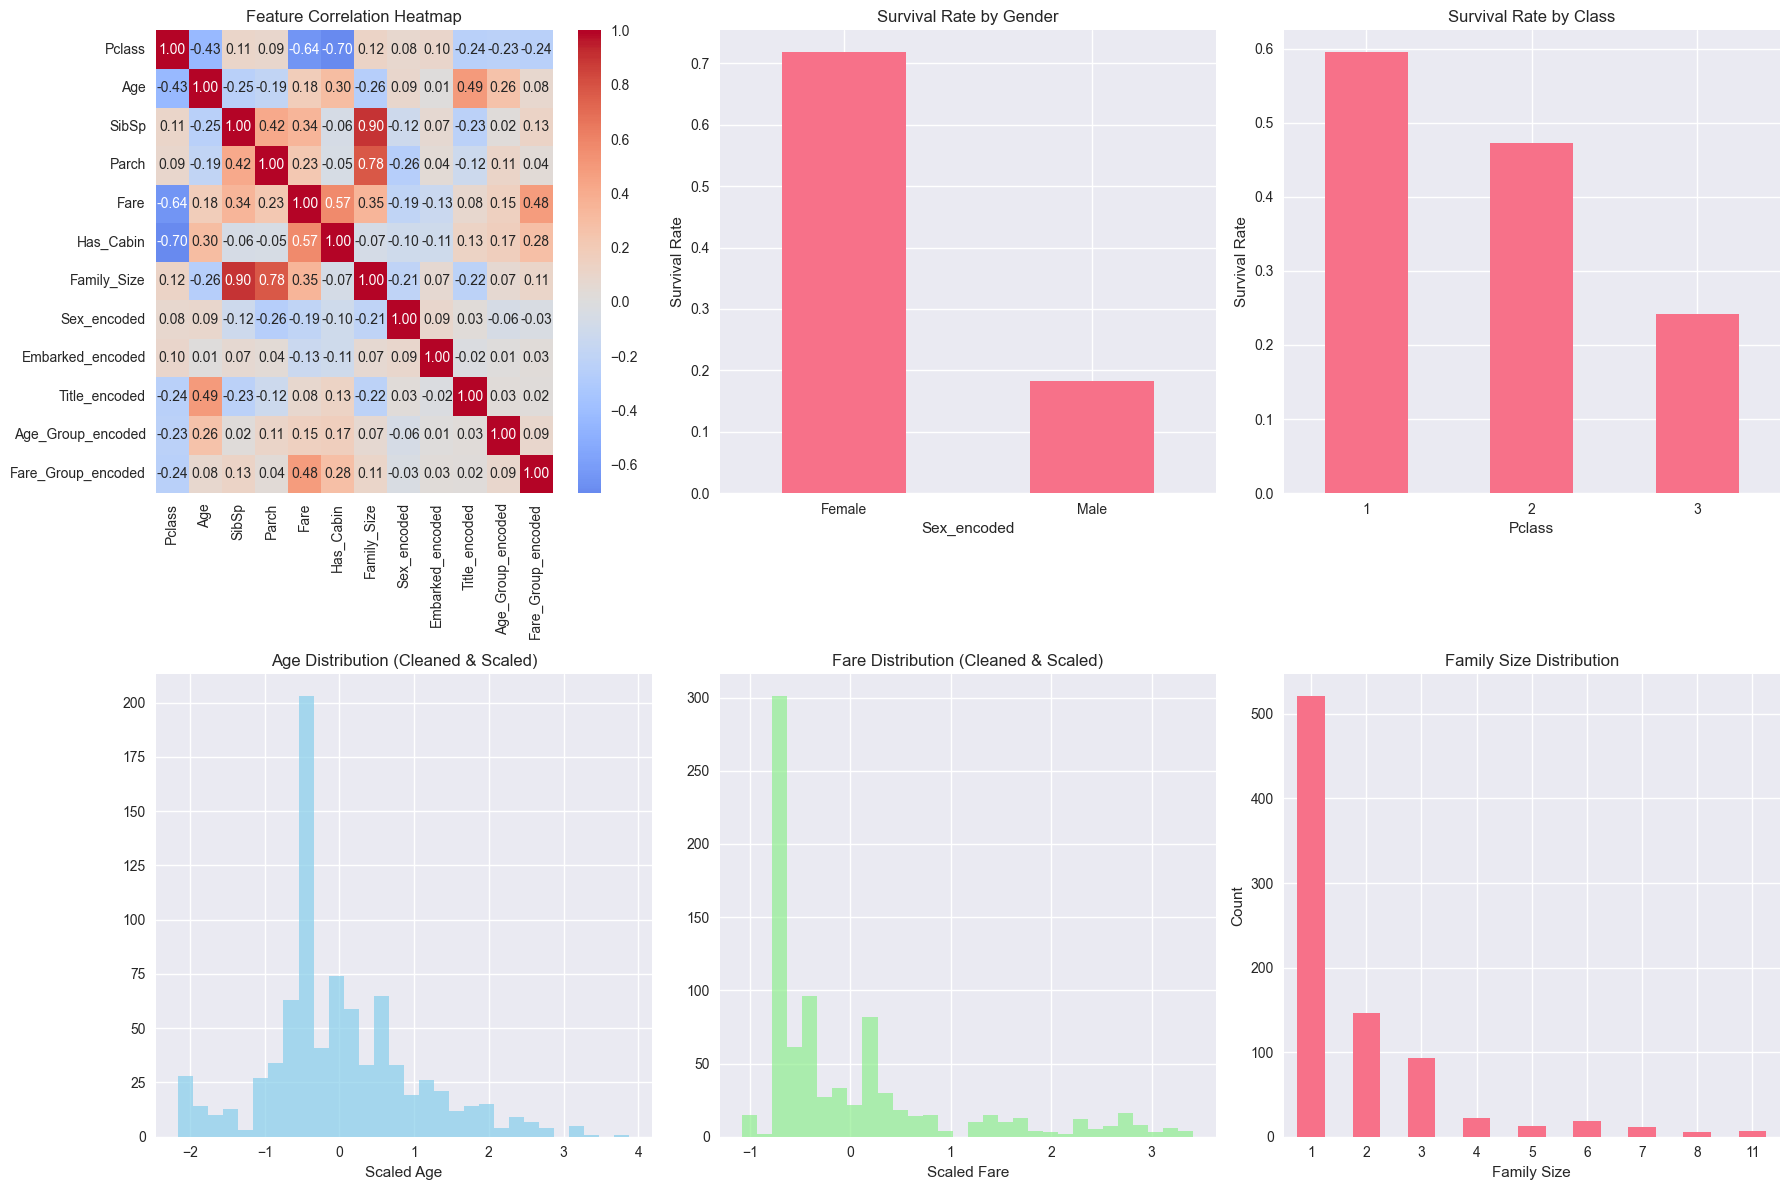

In [12]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Correlation heatmap
plt.subplot(2, 3, 1)
correlation_matrix = X_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')

# 2. Survival by gender
plt.subplot(2, 3, 2)
survival_by_sex = df_clean.groupby('Sex_encoded')['Survived'].mean()
survival_by_sex.plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.ylabel('Survival Rate')

# 3. Survival by class
plt.subplot(2, 3, 3)
survival_by_class = df_clean.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='bar')
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# 4. Age distribution after cleaning
plt.subplot(2, 3, 4)
plt.hist(X_scaled['Age'], bins=30, alpha=0.7, color='skyblue')
plt.title('Age Distribution (Cleaned & Scaled)')
plt.xlabel('Scaled Age')

# 5. Fare distribution after cleaning
plt.subplot(2, 3, 5)
plt.hist(X_scaled['Fare'], bins=30, alpha=0.7, color='lightgreen')
plt.title('Fare Distribution (Cleaned & Scaled)')
plt.xlabel('Scaled Fare')

# 6. Family size distribution
plt.subplot(2, 3, 6)
family_size_counts = df_clean['Family_Size'].value_counts().sort_index()
family_size_counts.plot(kind='bar')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [14]:
print(f"Original dataset shape: {df.shape}")
print(f"Final cleaned dataset shape: {df_clean.shape}")
print(f"Features removed: {df.shape[0] - df_clean.shape[0]} rows")
print(f"Features engineered: {df_clean.shape[1] - df.shape[1] + len(columns_to_drop)} new features")

print("\nFinal dataset info:")
print(f"- No missing values: {df_clean.isnull().sum().sum() == 0}")
print(f"- All categorical variables encoded: ✓")
print(f"- Numerical features scaled: ✓")
print(f"- Extreme outliers removed: ✓")

# Save cleaned dataset
df_clean.to_csv('titanic_cleaned.csv', index=False)
X_scaled.to_csv('titanic_features_scaled.csv', index=False)
y.to_csv('titanic_target.csv', index=False)

print("\nCleaned datasets saved:")
print("- titanic_cleaned.csv: Complete cleaned dataset")
print("- titanic_features_scaled.csv: Scaled features only")
print("- titanic_target.csv: Target variable")

print("\n DATA READY FOR MACHINE LEARNING")

# Final check
print("\nFinal dataset sample:")
df_clean.head()

Original dataset shape: (891, 12)
Final cleaned dataset shape: (838, 13)
Features removed: 53 rows
Features engineered: 4 new features

Final dataset info:
- No missing values: True
- All categorical variables encoded: ✓
- Numerical features scaled: ✓
- Extreme outliers removed: ✓

Cleaned datasets saved:
- titanic_cleaned.csv: Complete cleaned dataset
- titanic_features_scaled.csv: Scaled features only
- titanic_target.csv: Target variable

 DATA READY FOR MACHINE LEARNING

Final dataset sample:


,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Family_Size,Sex_encoded,Embarked_encoded,Title_encoded,Age_Group_encoded,Fare_Group_encoded
0,0,3,22.0,1,0,7.2500,0,2,1,2,2,0,1
1,1,1,38.0,1,0,71.2833,1,2,0,0,3,2,3
2,1,3,26.0,0,0,7.9250,0,1,0,2,1,0,2
3,1,1,35.0,1,0,53.1000,1,2,0,2,3,0,3
4,0,3,35.0,0,0,8.0500,0,1,1,2,2,0,2
